In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/processed/2023_pace_laps_with_delta_phase.csv")

In [3]:
FEATURES = [
    "TyreLife",
    "TyreLifeSquared",
    "LapInStint",
    "LapNumber",
    "Stint",
    "Compound_encoded",
    "Driver_encoded",
    "Team_encoded",
    "FuelProxy",
    "RaceProgress",
]

In [4]:
TARGET = "LapDelta_seconds"

In [6]:

X = df[FEATURES]
y = df[TARGET]

# Load trained model
model = joblib.load("../models/lap_delta_random_forest_prelap_phase.pkl")

In [7]:
importances = model.feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": FEATURES,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

feature_importance_df


,Feature,Importance
9,RaceProgress,0.205605
8,FuelProxy,0.199936
3,LapNumber,0.184376
5,Compound_encoded,0.146382
2,LapInStint,0.068096
7,Team_encoded,0.055488
4,Stint,0.044332
6,Driver_encoded,0.038525
1,TyreLifeSquared,0.028711
0,TyreLife,0.028548


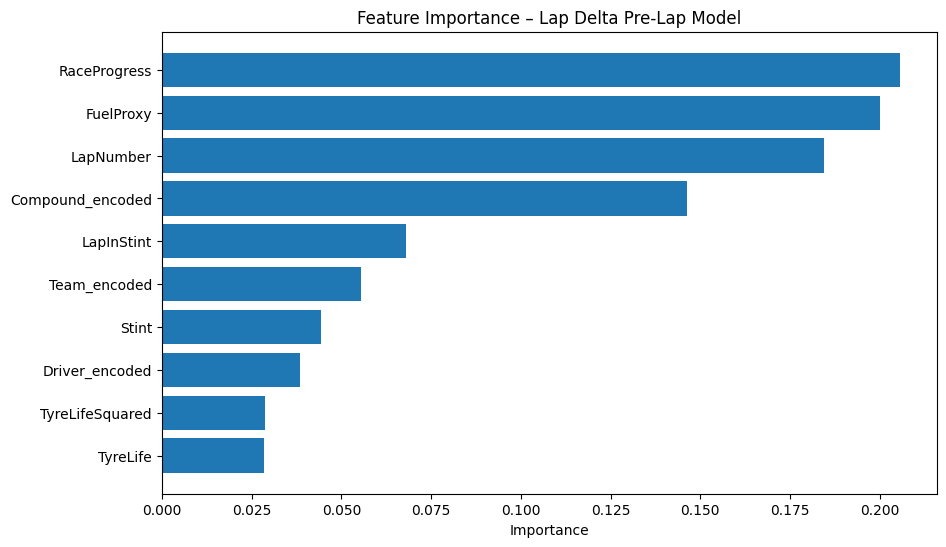

In [8]:
plt.figure(figsize=(10, 6))
plt.barh(
    feature_importance_df["Feature"],
    feature_importance_df["Importance"]
)
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Feature Importance – Lap Delta Pre-Lap Model")
plt.show()
